# OSIC Pulmonary Fibrosis Progression

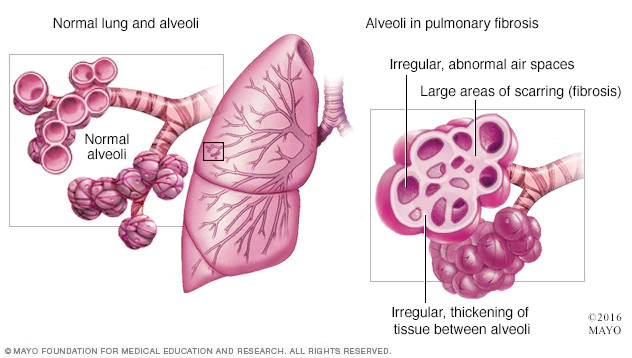

## Objective:
Predict Patient’s severity of decline in lung function based on a CT scan of their lungs. You’ll determine lung function based on output from a spirometer, which measures the volume of air inhaled and exhaled.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
train_data = pd.read_csv("/kaggle/input/osic-pulmonary-fibrosis-progression/train.csv")
train_data.info()

## EDA - Patient Details 

In [ ]:
def get_unique(df):
    cols = df.columns
    for col in cols:
        print(col+" : "+str(df[col].nunique()))

get_unique(train_data)

<font color = '#2C8087'> There in 176 Patients details in the training set.

In [ ]:
patient = train_data.head(36)#train_data[train_data.Patient=='ID00023637202179104603099'] #  ID00090637202204766623410
fig = px.line(patient, x="Weeks", y="FVC", title='FVC of a patient', color='Patient')
fig.show()

<font color = '#2C8087'> A sample of 4 patients. FVC is going down weeks by weeks.

In [ ]:
patient = train_data.head(36)#train_data[train_data.Patient=='ID00023637202179104603099'] #  ID00090637202204766623410
fig = px.line(patient, x="Weeks", y="Percent", title='Percent of a patient', color='Patient')
fig.show()

In [ ]:
week =  train_data.Weeks.value_counts().reset_index(name = 'count')
mean = train_data.Weeks.median()
y = train_data.Weeks.max()
fig = px.bar(week, x='index', y='count', color='index')
fig.update_layout(
    title="CT Scan Weeks distribution",
    xaxis_title="Weeks",
    yaxis_title="Counts",
    font=dict(
        family="sans serif",
        size=15,
        color="#7f7f7f"
    )
)
fig.add_shape(
        go.layout.Shape(
            type="line",
            x0=-.5,
            y0=mean,
            x1=y-.5,
            y1=mean,
            line=dict(
                color="red",
                width=2,
                dash="dash",
            ),
    ))
fig.show()

<font color='#2C8087 '> The average time a patient have the CT Scan is 28 weeks

In [ ]:
fvc = train_data.groupby(['Sex','FVC'])['FVC'].count().reset_index(name = 'Count')
fig = px.histogram(fvc, x="FVC", color='Sex')
fig.update_layout(
    title="FVC distribution for Male/Female",
    xaxis_title="FVC values",
    yaxis_title="Counts",
    font=dict(
        family="sans serif",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

<font color='#2C8087 '>The average FVC level is for females, ranges from 1300 to 1800
for Males, ranges from 2000 to 3000.</font>

In [ ]:
fvc = train_data.groupby(['SmokingStatus','FVC'])['FVC'].count().reset_index(name = 'Count')
fig = px.histogram(fvc, x="FVC", color='SmokingStatus')
fig.update_layout(
    title="FVC distribution for Smokers Type",
    xaxis_title="FVC values",
    yaxis_title="Counts",
    font=dict(
        family="sans serif",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

In [ ]:
sm_per_mean = train_data.groupby('SmokingStatus')['Percent'].mean().reset_index(name = 'Average')
fig = px.bar(sm_per_mean, x='SmokingStatus', y='Average', color='SmokingStatus')
fig.update_layout(
    title="Infected Percent by Smoking Types",
    xaxis_title="Smoking Types",
    yaxis_title="Counts",
    font=dict(
        family="sans serif",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

In [ ]:
smoke = train_data.groupby('SmokingStatus')['SmokingStatus'].count().reset_index(name = 'count')
smoke

## Smoking Status Distribution

In [ ]:
fig = px.bar(smoke, x='SmokingStatus', y='count', color = 'SmokingStatus')
fig.update_layout(
    title="Smoking Status Distribution",
    xaxis_title="Smoking Types",
    yaxis_title="Counts",
    font=dict(
        family="sans serif",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

In [ ]:
sex = train_data.groupby('Sex')['Sex'].count().reset_index(name = 'count')
fig = px.bar(sex, x='Sex', y='count', color = 'Sex')
fig.update_layout(
    title="Gender Distribution",
    xaxis_title="Gender Types",
    yaxis_title="Counts",
    font=dict(
        family="sans serif",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

In [ ]:
age = train_data.groupby('Age')['Age'].count().reset_index(name = 'count')
fig = px.bar(age, x='Age', y='count', color = 'Age')
fig.update_layout(
    title="Patient Age Distribution",
    xaxis_title="Age",
    yaxis_title="Counts",
    font=dict(
        family="sans serif",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

In [ ]:
week = train_data.groupby('Weeks')['Weeks'].count().reset_index(name = 'count')
fig = px.bar(week, x='Weeks', y='count', color = 'Weeks')
fig.update_layout(
    title="Weeks Distribution",
    xaxis_title="Weeks",
    yaxis_title="Counts",
    font=dict(
        family="sans serif",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

In [ ]:
ss = train_data.groupby(['SmokingStatus','Sex'])['Sex'].count().reset_index(name= 'Count')
fig = px.bar(ss, x='SmokingStatus', y='Count', color = 'Sex')
fig.update_layout(
    title="Who smokes high? Male/Female",
    xaxis_title="Smoking",
    yaxis_title="Count",
    font=dict(
        family="sans serif",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

In [ ]:
ss = train_data.groupby(['Age','Sex'])['Sex'].count().reset_index(name= 'Count')
fig = px.bar(ss, x='Age', y='Count', color = 'Sex')
fig.update_layout(
    title="What Age people smokes high? Male/Female",
    xaxis_title="Age levels",
    yaxis_title="Count",
    font=dict(
        family="sans serif",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

In [ ]:
ss = train_data.groupby(['SmokingStatus','Age'])['SmokingStatus'].count().reset_index(name= 'Count')
fig = px.bar(ss, x='Age', y='Count', color = 'SmokingStatus')
fig.update_layout(
    title="Age wise Smoking types",
    xaxis_title="Age",
    yaxis_title="Count",
    font=dict(
        family="sans serif",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

In [ ]:
ss = train_data.groupby(['Percent','Age','Sex'])['Sex'].count().reset_index(name= 'Count')
fig = px.scatter(ss, x='Age', y='Percent', color = 'Sex')
fig.update_layout(
    title="What age Male/Female affected high",
    xaxis_title="Age",
    yaxis_title="Affected Percent",
    font=dict(
        family="sans serif",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

In [ ]:
ss = train_data.groupby(['Percent','Weeks','Sex'])['Sex'].count().reset_index(name= 'Count')
fig = px.scatter(ss, x='Weeks', y='Percent', color = 'Sex')
fig.update_layout(
    title="Patient Affected by week",
    xaxis_title="Weeks",
    yaxis_title="Affected Percent",
    font=dict(
        family="sans serif",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

In [ ]:
ss = train_data.groupby(['Percent','Weeks','SmokingStatus'])['SmokingStatus'].count().reset_index(name= 'Count')
fig = px.scatter(ss, x='Weeks', y='Percent', color = 'SmokingStatus')
fig.update_layout(
    title="Patient Affected by week",
    xaxis_title="Weeks",
    yaxis_title="Affected Percent",
    font=dict(
        family="sans serif",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

In [ ]:
ss = train_data.groupby(['Age','Weeks','SmokingStatus'])['SmokingStatus'].count().reset_index(name= 'Count')
fig = px.scatter(ss, x='Weeks', y='Age', color = 'SmokingStatus')
fig.update_layout(
    title="Patient Affected by week",
    xaxis_title="Weeks",
    yaxis_title="Age",
    font=dict(
        family="sans serif",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

In [ ]:
ss = train_data.groupby(['Age','Weeks','Sex'])['Sex'].count().reset_index(name= 'Count')
fig = px.scatter(ss, x='Weeks', y='Age', color = 'Sex')
fig.update_layout(
    title="Patient Affected by week",
    xaxis_title="Age",
    yaxis_title="Affected Percent",
    font=dict(
        family="sans serif",
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

In [ ]:
weks = train_data.groupby(['Weeks','Sex'])['Sex'].count().reset_index(name = 'Count')
fig = px.line(weks, x="Weeks", y="Count", title='Weekly Gender relations', color='Sex')
fig.show()

In [ ]:
weks = train_data.groupby(['Weeks','SmokingStatus'])['SmokingStatus'].count().reset_index(name = 'Count')
fig = px.line(weks, x="Weeks", y="Count", title='Weekly Smokers relations', color='SmokingStatus')
fig.show()

In [ ]:
age_ss = train_data.groupby(['Age','SmokingStatus'])['SmokingStatus'].count().reset_index(name = 'Count')
fig = px.line(age_ss, x="Age", y="Count", title='Age-Smokers relations', color='SmokingStatus')
fig.show()

In [ ]:
cols = ['Percent','FVC','Age','Weeks']
ffs = train_data[cols]
dd = ffs.corr(method ='pearson')
fit = px.imshow(dd, x = cols, y = cols)
fit.show()

In [ ]:
fig = px.box(train_data, y="Age", points = 'all')
fig.show()

In [ ]:
fig = px.box(train_data, y="Percent", points = 'all')
fig.show()

In [ ]:
fig = px.box(train_data, y="FVC", points = 'all')
fig.show()

In [ ]:
fig = px.box(train_data, y="Weeks", points = 'all')
fig.show()

In [ ]:
fig = px.box(train_data, y="Age", x ='Sex',points = 'all')
fig.show()

In [ ]:
fig = px.box(train_data, y="Age", x ='SmokingStatus')
fig.show()

In [ ]:
fig = px.box(train_data, y="Weeks", x ='Sex', points = 'all')
fig.show()

In [ ]:
fig = px.box(train_data, y="Weeks", x ='SmokingStatus')
fig.show()

In [ ]:
fig = px.box(train_data, y="FVC", x ='Sex')
fig.show()

In [ ]:
fig = px.box(train_data, y="FVC", x ='SmokingStatus')
fig.show()

## DICOM Analysis

In [ ]:
import pydicom as dicom
import matplotlib.pyplot as plt

In [ ]:
data_ =  dicom.dcmread("../input/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/1.dcm")
plt.imshow(data_.pixel_array)
plt.axis('off')
plt.show()

## DICOM Sample 1

In [ ]:
basepath = '../input/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430'
fig, axes = plt.subplots(nrows=10, ncols=3,figsize=(15,10)) 
for ax, entry in zip(axes.flatten(),os.listdir(basepath)):
    if os.path.isfile(os.path.join(basepath, entry)):
        data_ =  dicom.dcmread(basepath+'/'+entry)
        ax.imshow(data_.pixel_array)
        ax.axis('off')
        ax.autoscale(enable=True)
        
plt.show()

## DICOM Sample 2

In [ ]:
basepath = '../input/osic-pulmonary-fibrosis-progression/train/ID00019637202178323708467'
fig, axes = plt.subplots(nrows=10, ncols=3,figsize=(15,10)) 
for ax, entry in zip(axes.flatten(),os.listdir(basepath)):
    if os.path.isfile(os.path.join(basepath, entry)):
        data_ =  dicom.dcmread(basepath+'/'+entry)
        ax.imshow(data_.pixel_array)
        ax.axis('off')
        ax.autoscale(enable=True)
        
plt.show()

## If you like this kernel plz <font color='red'>UPVOTE</font>.
## If you have suggestions to improve this kernel plz <font color='red'>COMMENT</font>.

<font color='Blue'>************************ Notebook is under construction ************************</font>